<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/AD5-W...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,120,5.27.3,2023-01-05 15:39:31,None,NaT
1,1e5a820b-3464-478a-926f-a473ae402175,Aya 4,https://play-lh.googleusercontent.com/a/AEdFTp...,Bagus sih. Cuman skrg ribet. krn sering kali m...,3,24,5.27.3,2023-01-17 01:15:20,None,NaT
2,798fd05d-c1b8-4bbb-b16a-fb42bb5ac32f,Ranie,https://play-lh.googleusercontent.com/a-/AD5-W...,"Setelah 4thn ga buka akun BL, barusan saya buk...",1,54,5.27.3,2023-01-13 02:11:50,None,NaT
3,9e769ec0-5063-4f7c-8fef-ac2f90b95046,Fajron Musayyab,https://play-lh.googleusercontent.com/a-/AD5-W...,"Maaf saya kasih bintang 2, karena untuk layana...",2,4,5.27.3,2023-01-11 23:20:18,None,NaT
4,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,109,5.27.2,2022-12-30 03:49:00,None,NaT


In [5]:
len(df_busu.index) #count the number of data we got

1300

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,FST GAMING,1,2022-09-14 18:24:38,"Lawak ni applikasi, sudah jadi aplikasi Underr..."
1296,Pengguna Google,1,2018-12-24 06:15:22,"Aplikasi kurang berkualitas,tidak ada bedanya ..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,Terburuk dari semua aplikasi penjualan yang pe...
1298,sarip kedung,3,2022-10-14 21:18:02,Biaya Ongkir kurangin jangan terlalu mahal..ba...
1299,Stefanus Ananda Sapta Putra,5,2022-08-31 09:29:58,"Belanja di sini belum pernah ada kekecewaan, k..."


In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,FST GAMING,1,2022-09-14 18:24:38,"Lawak ni applikasi, sudah jadi aplikasi Underr..."
1296,Pengguna Google,1,2018-12-24 06:15:22,"Aplikasi kurang berkualitas,tidak ada bedanya ..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,Terburuk dari semua aplikasi penjualan yang pe...
1298,sarip kedung,3,2022-10-14 21:18:02,Biaya Ongkir kurangin jangan terlalu mahal..ba...
1299,Stefanus Ananda Sapta Putra,5,2022-08-31 09:29:58,"Belanja di sini belum pernah ada kekecewaan, k..."


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
1,Aya 4,3,2023-01-17 01:15:20,Bagus sih. Cuman skrg ribet. krn sering kali m...
2,Ranie,1,2023-01-13 02:11:50,"Setelah 4thn ga buka akun BL, barusan saya buk..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,"Maaf saya kasih bintang 2, karena untuk layana..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...


In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [14]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [18]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [19]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ..."
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y..."
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah..."


In [20]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [21]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
1075,MUGIYONO,5,2023-01-18 12:40:14,sangat membantu saya untuk mencari barang yg s...,"[sangat, membantu, saya, untuk, mencari, baran..."
1074,yuma aditya,4,2023-01-18 12:29:36,susah mengganti akun dana sedangkan nomor akun...,"[susah, mengganti, akun, dana, sedangkan, nomo..."
261,Putri Adelia Khrisna,5,2023-01-18 12:18:35,mau tanya kenapa bukalapak paylaternya ga bisa...,"[mau, tanya, kenapa, bukalapak, paylaternya, g..."
1066,Ahmad Rofi,1,2023-01-18 11:27:20,mw komplain di aplikasi ini di persulit sepert...,"[mw, komplain, di, aplikasi, ini, di, persulit..."
790,Erwin Setiawann,5,2023-01-18 09:41:16,bukalapak memang top dan amanah semoga jadi de...,"[bukalapak, memang, top, dan, amanah, semoga, ..."


In [22]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [23]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
1    [(ribet, 2), (krn, 2), (susah, 2), (tdk, 2), (...
2    [(ada, 4), (yg, 4), (bl, 3), (barang, 3), (lbh...
3    [(tidak, 2), (sesuai, 2), (dan, 2), (maaf, 1),...
4    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
Name: Ulasan_tokenize, dtype: object


In [24]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [aplikasi, parah, saya, belanja, dengan, cc, p...
1       [bagus, sih, cuman, skrg, ribet, krn, sering, ...
2       [setelah, thn, ga, buka, akun, bl, barusan, sa...
3       [maaf, saya, kasih, bintang, karena, untuk, la...
4       [sy, kesulitan, ingin, komplen, masalah, pemba...
                              ...                        
1295    [lawak, ni, applikasi, sudah, jadi, aplikasi, ...
1296    [aplikasi, kurang, berkualitastidak, ada, beda...
1297    [terburuk, dari, semua, aplikasi, penjualan, y...
1298    [biaya, ongkir, kurangin, jangan, terlalu, mah...
1299    [belanja, di, sini, belum, pernah, ada, kekece...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [25]:
slank_word_dict = {
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [26]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [27]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [28]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem..."
...,...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ...","[lawak, ini, aplikasi, sudah, jadi, aplikasi, ..."
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, kurang, berkualitastidak, ada, beda..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, dari, semua, aplikasi, penjualan, y..."
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah...","[biaya, ongkir, kurangi, jangan, terlalu, maha..."


In [29]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [aplikasi, parah, saya, belanja, dengan, cc, p...
1       [bagus, sih, cuman, sekarang, ribet, karena, s...
2       [setelah, tahun, enggak, buka, akun, bl, barus...
3       [maaf, saya, kasih, bintang, karena, untuk, la...
4       [saya, kesulitan, ingin, komplen, masalah, pem...
                              ...                        
1295    [lawak, ini, aplikasi, sudah, jadi, aplikasi, ...
1296    [aplikasi, kurang, berkualitastidak, ada, beda...
1297    [terburuk, dari, semua, aplikasi, penjualan, y...
1298    [biaya, ongkir, kurangi, jangan, terlalu, maha...
1299    [belanja, di, sini, belum, pernah, ada, kekece...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [30]:
from nltk.corpus import stopwords

In [31]:
list_stopwords = stopwords.words('indonesian')

In [32]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [33]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,..."
...,...,...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ...","[lawak, ini, aplikasi, sudah, jadi, aplikasi, ...","[lawak, aplikasi, aplikasi, underratedmasih, k..."
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, berkualitastidak, bedanya, aplikasi..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, aplikasi, penjualan, akun, bekukan,..."
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah...","[biaya, ongkir, kurangi, jangan, terlalu, maha...","[biaya, ongkir, kurangi, mahalbanyakin, promo,..."


In [34]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 6.5 MB/s eta 0:00:00


In [35]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=d68dfe90e7226db7c36a1b5b30f3c8503e54b5af0f7c06dfd90c0da89d1e6efc
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [36]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4416
------------------------
aplikasi : aplikasi
parah : parah
belanja : belanja
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : confirmasi
urus : urus
teman : teman
metode : metode
korban : korban
kabar : kabar
bukalapak : bukalapak
bagus : bagus
sih : sih
cuman : cuman
ribet : ribet
kali : kali
update : update
aplikasinya : aplikasi
susah : susah
bertransaksi : transaksi
hp : hp
memorinya : memori
terbatas : batas
hapus : hapus
terpaksa : paksa
buka : buka
akun : akun
bl : bl
barusan : barusan
ceritanya : cerita
barang : barang
dibeli : beli
harapan : harap
dibl : dibl
murah : murah
promo : promo
menarik : tarik
dijual : jual
lengkap : lengkap
sekalinya : sekali
pilihan : pilih
seller : seller
akibatnya : akibat
mahal : mahal
marketplace : marketplace
sebelah : belah
disaat : saat
voucher : voucher
gratis : gratis
ongkir : ongkir
mengasih : asih
diskon : diskon
nya : nya
instan : instan
maaf : maaf
kasih : kasih
bintang : bintang
layanan :

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [37]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang..."
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p..."
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon..."
...,...,...,...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ...","[lawak, ini, aplikasi, sudah, jadi, aplikasi, ...","[lawak, aplikasi, aplikasi, underratedmasih, k...","[lawak, aplikasi, aplikasi, underratedmasih, k..."
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, berkualitastidak, bedanya, aplikasi...","[aplikasi, berkualitastidak, beda, aplikasi, b..."
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, aplikasi, penjualan, akun, bekukan,...","[buruk, aplikasi, jual, akun, beku, aktif, pro..."
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah...","[biaya, ongkir, kurangi, jangan, terlalu, maha...","[biaya, ongkir, kurangi, mahalbanyakin, promo,...","[biaya, ongkir, kurang, mahalbanyakin, promo, ..."


In [38]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [39]:
name_dataframe.to_excel("tokped_text.xlsx")

In [40]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [41]:
tokenize_ulasan = word_tokenize(ulasan)

In [42]:
tokenize_ulasan

['aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'bagus',
 'sih',
 'cuman',
 'ribet',
 'kali',
 'update',
 'aplikasi',
 'susah',
 'transaksi',
 'susah',
 'hp',
 'memori',
 'batas',
 'hapus',
 'paksa',
 'aplikasi',
 'ribet',
 'buka',
 'akun',
 'bl',
 'barusan',
 'buka',
 'cerita',
 'barang',
 'beli',
 'harap',
 'dibl',
 'murah',
 'promo',
 'tarik',
 'bl',
 'tarik',
 'barang',
 'jual',
 'lengkap',
 'sekali',
 'pilih',
 'seller',
 'akibat',
 'barang',
 'jual',
 'mahal',
 'marketplace',
 'belah',
 'saat',
 'voucher',
 'gratis',
 'ongkir',
 'bl',
 'asih',
 'diskon',
 'nya',
 'ongkir',
 'instan',
 'mahal',
 'belah',
 'maaf',
 'kasih',
 'bintang',
 'layan',
 'customer',
 'aju',
 'pesan',
 'custom',
 'bebas',
 'sesuai',
 'kalimat',
 'hari',
 'sih',
 'beli',
 'kes',
 'baku',
 'sesuai',
 'atur',
 'aplikasi',
 'marketplace',
 'toko',
 'hijau',
 'orange',


In [43]:
fqdist = FreqDist(tokenize_ulasan)

In [44]:
fqdist

FreqDist({'bukalapak': 568, 'aplikasi': 474, 'nya': 400, 'barang': 382, 'bayar': 276, 'pakai': 256, 'buka': 252, 'beli': 242, 'kirim': 232, 'belanja': 219, ...})

In [45]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 568),
 ('aplikasi', 474),
 ('nya', 400),
 ('barang', 382),
 ('bayar', 276),
 ('pakai', 256),
 ('buka', 252),
 ('beli', 242),
 ('kirim', 232),
 ('belanja', 219),
 ('jual', 205),
 ('lapak', 196),
 ('transaksi', 184),
 ('bantu', 170),
 ('chat', 155)]

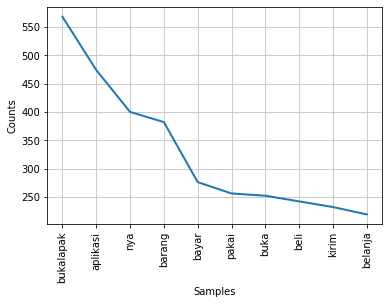

In [46]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [47]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
...,...,...,...,...,...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ...","[lawak, ini, aplikasi, sudah, jadi, aplikasi, ...","[lawak, aplikasi, aplikasi, underratedmasih, k...","[lawak, aplikasi, aplikasi, underratedmasih, k...",lawak aplikasi aplikasi underratedmasih konyol...,0
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, berkualitastidak, bedanya, aplikasi...","[aplikasi, berkualitastidak, beda, aplikasi, b...",aplikasi berkualitastidak beda aplikasi belah ...,0
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, aplikasi, penjualan, akun, bekukan,...","[buruk, aplikasi, jual, akun, beku, aktif, pro...",buruk aplikasi jual akun beku aktif produk mun...,0
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah...","[biaya, ongkir, kurangi, jangan, terlalu, maha...","[biaya, ongkir, kurangi, mahalbanyakin, promo,...","[biaya, ongkir, kurang, mahalbanyakin, promo, ...",biaya ongkir kurang mahalbanyakin promo gratis...,0


In [48]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [49]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0


In [50]:
from textblob import TextBlob


In [51]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [52]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0,0.00,0.00,Neutral
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.00,0.00,Neutral
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.00,0.00,Neutral
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral


In [53]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
1,Aya 4,3,2023-01-17 01:15:20,bagus sih cuman skrg ribet krn sering kali min...,"[bagus, sih, cuman, skrg, ribet, krn, sering, ...","[bagus, sih, cuman, sekarang, ribet, karena, s...","[bagus, sih, cuman, ribet, kali, update, aplik...","[bagus, sih, cuman, ribet, kali, update, aplik...",bagus sih cuman ribet kali update aplikasi sus...,0,0.00,0.00,Neutral
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.00,0.00,Neutral
3,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.00,0.00,Neutral
4,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,FST GAMING,1,2022-09-14 18:24:38,lawak ni applikasi sudah jadi aplikasi underra...,"[lawak, ni, applikasi, sudah, jadi, aplikasi, ...","[lawak, ini, aplikasi, sudah, jadi, aplikasi, ...","[lawak, aplikasi, aplikasi, underratedmasih, k...","[lawak, aplikasi, aplikasi, underratedmasih, k...",lawak aplikasi aplikasi underratedmasih konyol...,0,0.00,0.00,Neutral
1296,Pengguna Google,1,2018-12-24 06:15:22,aplikasi kurang berkualitastidak ada bedanya d...,"[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, kurang, berkualitastidak, ada, beda...","[aplikasi, berkualitastidak, bedanya, aplikasi...","[aplikasi, berkualitastidak, beda, aplikasi, b...",aplikasi berkualitastidak beda aplikasi belah ...,0,0.00,0.00,Neutral
1297,Antonius Andika Riski Setiawan,1,2022-08-10 08:46:22,terburuk dari semua aplikasi penjualan yang pe...,"[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, dari, semua, aplikasi, penjualan, y...","[terburuk, aplikasi, penjualan, akun, bekukan,...","[buruk, aplikasi, jual, akun, beku, aktif, pro...",buruk aplikasi jual akun beku aktif produk mun...,0,0.00,0.00,Neutral
1298,sarip kedung,3,2022-10-14 21:18:02,biaya ongkir kurangin jangan terlalu mahalbany...,"[biaya, ongkir, kurangin, jangan, terlalu, mah...","[biaya, ongkir, kurangi, jangan, terlalu, maha...","[biaya, ongkir, kurangi, mahalbanyakin, promo,...","[biaya, ongkir, kurang, mahalbanyakin, promo, ...",biaya ongkir kurang mahalbanyakin promo gratis...,0,0.00,0.00,Neutral


In [54]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Positive words


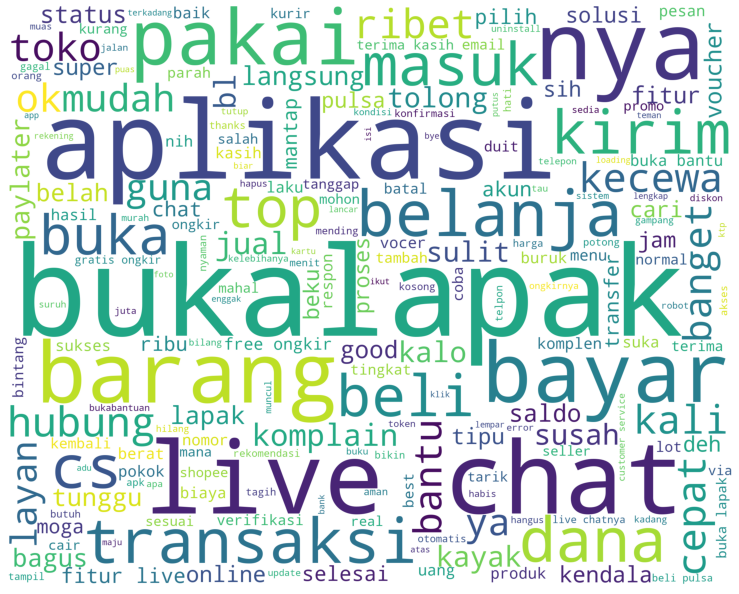

Negative words


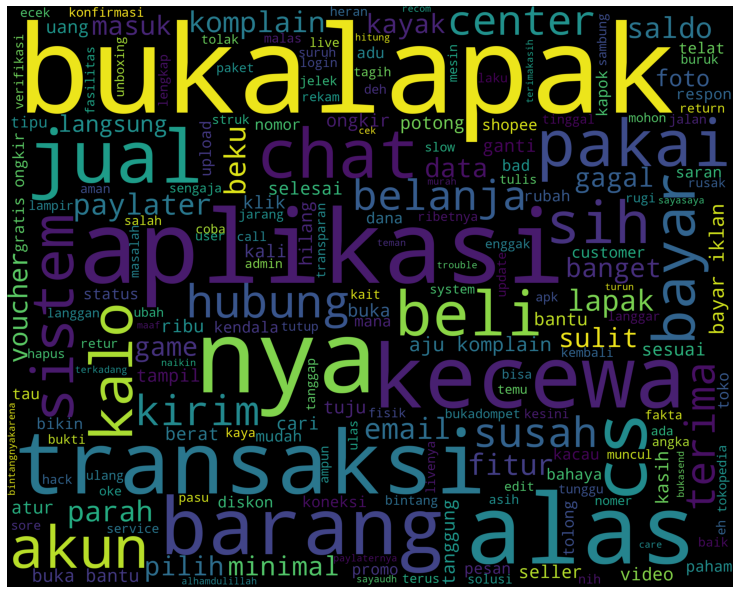

Neutral words


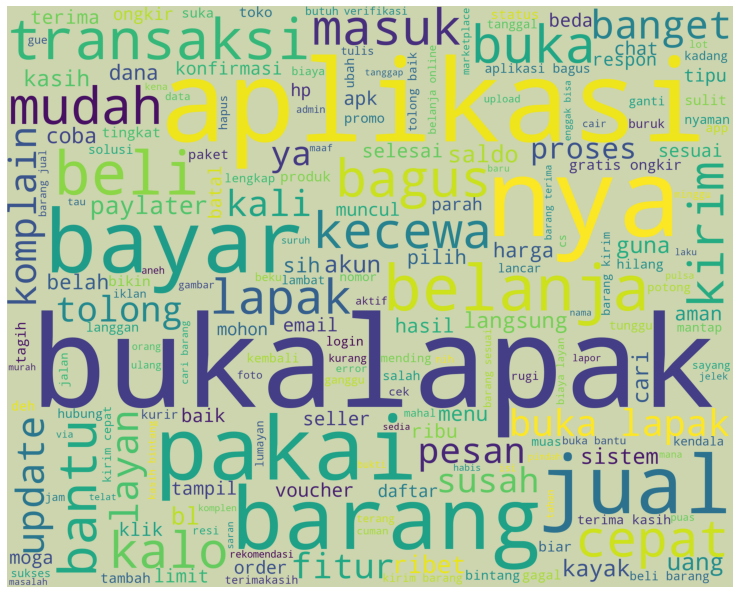

In [101]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("c words")
wordcloud_draw(train_net,'#ccd5ae')

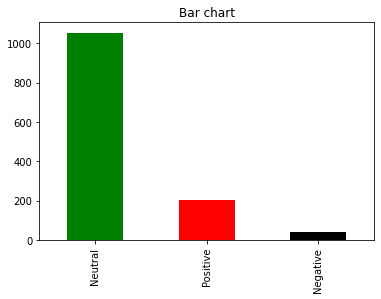

In [56]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [57]:
name_dataframe["Sentiment"].value_counts()

Neutral     1054
Positive     205
Negative      41
Name: Sentiment, dtype: int64

In [58]:
name_dataframe["Sentiment"].value_counts()

Neutral     1054
Positive     205
Negative      41
Name: Sentiment, dtype: int64

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [60]:
Ulasan = name_dataframe['Ulasan_clean']

In [61]:
Ulasan.isnull().sum()

0

In [62]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3500


In [63]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'aplikasi': 168,
 'parah': 2305,
 'belanja': 347,
 'cc': 634,
 'pilih': 2459,
 'klik': 1542,
 'cicil': 673,
 'tagih': 3092,
 'full': 1055,
 'confirmasi': 692,
 'urus': 3392,
 'teman': 3152,
 'metode': 1978,
 'korban': 1599,
 'kabar': 1396,
 'bukalapak': 536,
 'bagus': 230,
 'sih': 2958,
 'cuman': 714,
 'ribet': 2683,
 'kali': 1419,
 'update': 3373,
 'susah': 3069,
 'transaksi': 3283,
 'hp': 1220,
 'memori': 1930,
 'batas': 309,
 'hapus': 1172,
 'paksa': 2297,
 'buka': 529,
 'akun': 88,
 'bl': 459,
 'barusan': 302,
 'cerita': 655,
 'barang': 283,
 'beli': 351,
 'harap': 1174,
 'dibl': 807,
 'murah': 2044,
 'promo': 2546,
 'tarik': 3126,
 'jual': 1382,
 'lengkap': 1748,
 'sekali': 2829,
 'seller': 2855,
 'akibat': 72,
 'mahal': 1829,
 'marketplace': 1880,
 'belah': 345,
 'saat': 2723,
 'voucher': 3434,
 'gratis': 1126,
 'ongkir': 2222,
 'asih': 197,
 'diskon': 861,
 'nya': 2163,
 'instan': 1288,
 'maaf': 1821,
 'kasih': 1444,
 'bintang': 440,
 'layan': 1728,
 'customer': 720,
 'aju': 65

In [64]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 168)	1
  (0, 347)	2
  (0, 536)	1
  (0, 634)	1
  (0, 673)	2
  (0, 692)	1
  (0, 1055)	1
  (0, 1396)	1
  (0, 1542)	1
  (0, 1599)	1
  (0, 1978)	1
  (0, 2305)	1
  (0, 2459)	1
  (0, 3092)	1
  (0, 3152)	1
  (0, 3392)	1
  (1, 168)	2
  (1, 230)	1
  (1, 309)	1
  (1, 714)	1
  (1, 1172)	1
  (1, 1220)	1
  (1, 1419)	1
  (1, 1930)	1
  (1, 2297)	1
  :	:
  (1298, 1497)	1
  (1298, 1589)	1
  (1298, 1631)	1
  (1298, 1829)	1
  (1298, 1830)	1
  (1298, 1862)	1
  (1298, 2163)	2
  (1298, 2222)	3
  (1298, 2223)	1
  (1298, 2226)	1
  (1298, 2546)	1
  (1298, 2803)	1
  (1298, 3254)	1
  (1299, 283)	2
  (1299, 347)	1
  (1299, 644)	1
  (1299, 1423)	1
  (1299, 1465)	1
  (1299, 1539)	1
  (1299, 2553)	1
  (1299, 2675)	1
  (1299, 2735)	1
  (1299, 2850)	1
  (1299, 3317)	1
  (1299, 3479)	1


In [65]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

bagus sih cuman ribet kali update aplikasi susah transaksi susah hp memori batas hapus paksa aplikasi ribet


In [66]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 168)	2
  (0, 230)	1
  (0, 309)	1
  (0, 714)	1
  (0, 1172)	1
  (0, 1220)	1
  (0, 1419)	1
  (0, 1930)	1
  (0, 2297)	1
  (0, 2683)	2
  (0, 2958)	1
  (0, 3069)	2
  (0, 3283)	1
  (0, 3373)	1


In [67]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.78459412 7.07227619 7.07227619 ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3373)	0.1995680427469527
  (0, 3283)	0.16161365379629808
  (0, 3069)	0.38212353410220445
  (0, 2958)	0.2080644337455008
  (0, 2683)	0.3870639808605283
  (0, 2297)	0.2958498124911391
  (0, 1930)	0.3476915398882393
  (0, 1419)	0.19353199043026414
  (0, 1220)	0.23368578288675834
  (0, 1172)	0.25176689502485794
  (0, 714)	0.26271197243523886
  (0, 309)	0.2799552368157217
  (0, 230)	0.16697539094990174
  (0, 168)	0.23619024839667196


In [68]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [69]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-69-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [70]:
data_label.to_excel("data_label.xlsx")

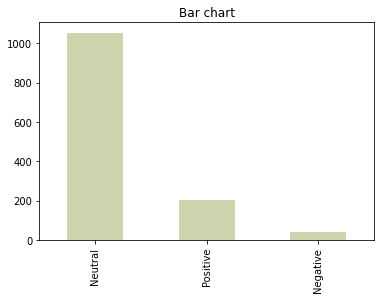

In [71]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

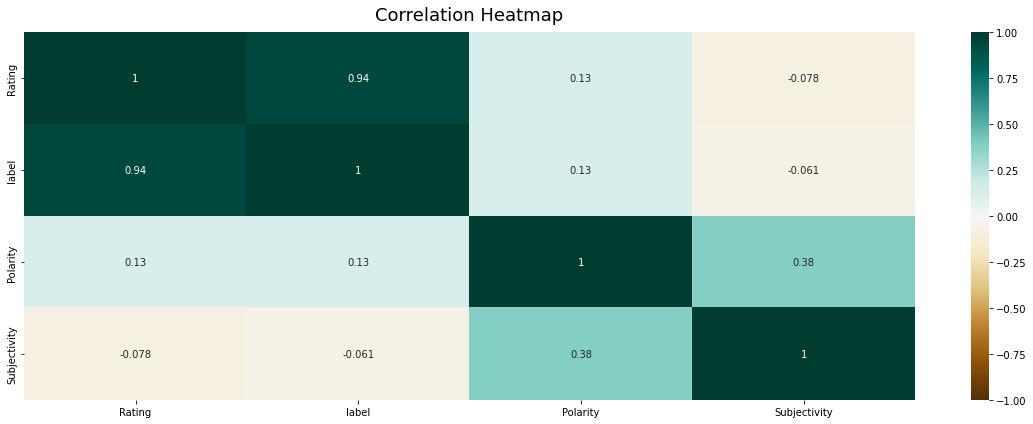

In [72]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [73]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [74]:
from wordcloud import WordCloud

In [75]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [76]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-76-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [77]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
15,Ahmad Amek,maaf turun bintangnyakarena pakai bukalapak pa...,Negative
16,Ulfa Mar'atus Solihah,edit ulas hubung customer care aplikasi kait b...,Negative
27,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
45,Tegar Ibnu,sih asih voucher gratis ongkir minimal potong ...,Negative
86,WesLi,susah hubungin cs sulit hubung cs pakai email ...,Negative
99,official store,aplikasi sungguh kecewa konsisten terap atur s...,Negative
101,Novi Nurhalimah,kecewa aplikasi bukalapak telat bayar jatuh te...,Negative
103,Helmi Arianto,jual barang bukalapak sabtu sore transaksi bar...,Negative
112,Richo Agustian,halo bukalapak email ganti alas gagal kirim em...,Negative
126,Hambali,rekan saran belanja bukalapak bayak tipu salah...,Negative


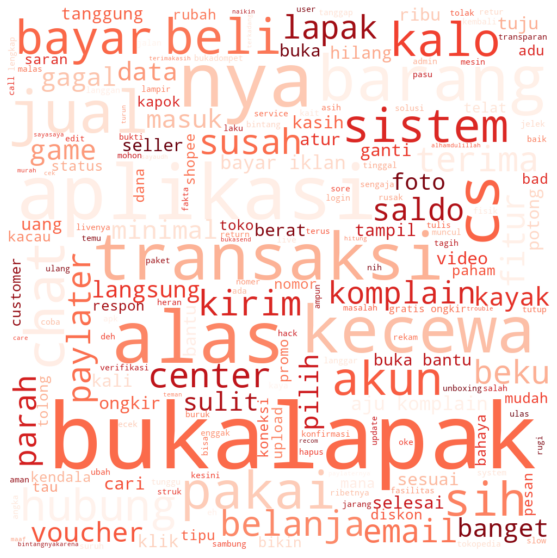

In [78]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

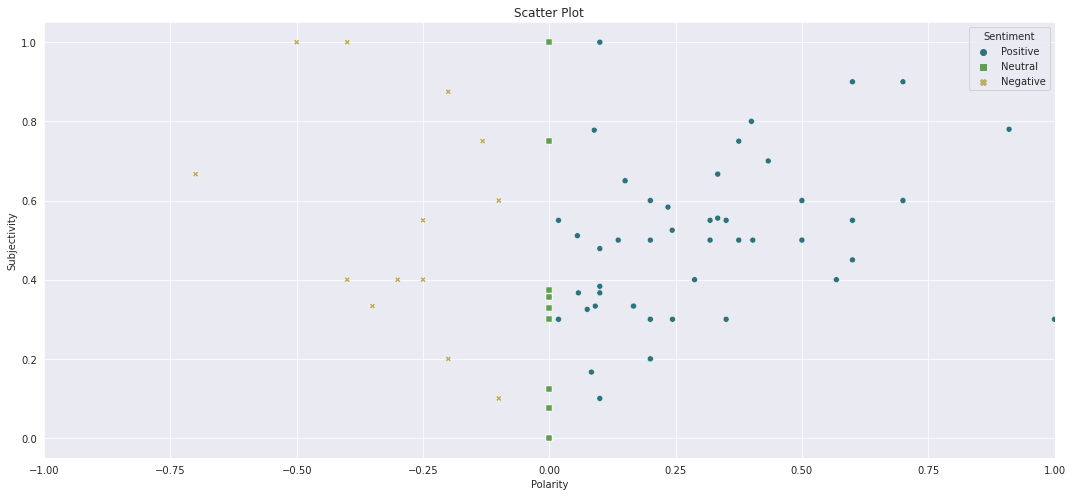

In [79]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [80]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [81]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-81-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [82]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
0,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
7,rizky adhi,fitur live chat tipu kontak cs hubung konsumen...,Positive
10,Animah Astuti,kali bintang sih csnya ramah layan langgan kai...,Positive
11,Hajna Agung Milkham,bobrok mesan cod masuk tagih detail sedia bata...,Positive
22,kastowo taylor,pakai bukalapak kali kecewa beli barang lapak ...,Positive
...,...,...,...
1241,Pengguna Google,kembang sederhana konsep guna vocer vocer grat...,Positive
1271,Joe R Saleh,sekian lapak puas perform lapak tampil user fr...,Positive
1272,fauzi cbr shop,layan buruk live chat ribet bug telfon cs dll ...,Positive
1282,Rizki Pratama,kesini aplikasi berat interfacenya user friend...,Positive


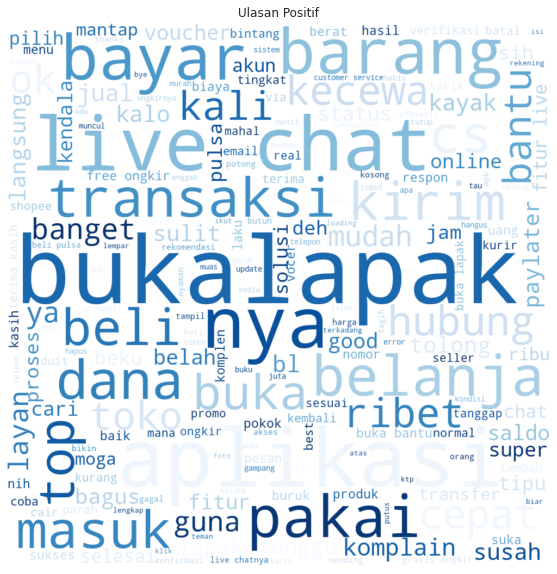

In [83]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [84]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-84-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [86]:
import numpy as np

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [88]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3243)
(130, 3243)


In [89]:
X_train = X_train.toarray()

In [90]:
X_test = X_test.toarray()

In [91]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits


{'var_smoothing': 0.0006468607661546328}

In [93]:
nb = GaussianNB(var_smoothing=1.0)

In [94]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [95]:
y_pred_nb = nb.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

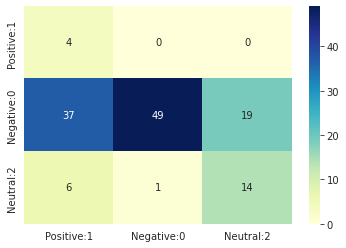

In [105]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Positive:1', 'Negative:0', 'Neutral:2'], 
                                 index=['Positive:1', 'Negative:0', 'Neutral:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [102]:
cm = confusion_matrix(y_test, y_pred_nb)

In [103]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 4  0  0]
 [37 49 19]
 [ 6  1 14]]


In [98]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 4  0  0]
 [37 49 19]
 [ 6  1 14]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.09      1.00      0.16         4
     Neutral       0.98      0.47      0.63       105
    Positive       0.42      0.67      0.52        21

    accuracy                           0.52       130
   macro avg       0.50      0.71      0.44       130
weighted avg       0.86      0.52      0.60       130



In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))